## Download Pre-trained Model Files

1. [index2word](https://drive.google.com/uc?id=1ERZ4QgVj8OCqpPhn2766MGB7yqJj3Lvy) : Contains mapping from index to word. Each index corresponds to unique word in vocabulary.
2. [word2index](https://drive.google.com/uc?id=1EZ4W5RZlrahl8W4AjlJxYSMeMkj9Cg_s) : Contains mapping from word to index. Each word in Vocabulary is mapped to unique index.
3. [word2count](https://drive.google.com/uc?id=1E_o1iA8AaOy6kDYLvyvLW1SUfFxAELpN) : Contains count of each word in the corpus. It provides frequency information for the words present in the vocabulary.
4. [word_vectors](https://drive.google.com/uc?id=1EOON9R2CnD7us1Zd_XfRkmtLEn27gGzi) : Contains word vectors. Each word is represented as dense vector in a high-dimensional space, capturing semantic relationships between words.

## Data Structures

### Vectors

In [ ]:
import numpy as np

In [ ]:
# load the word vectors
vectors = np.load('./data/word_vectors.npy')

In [ ]:
# type of vectors object
type(vectors)

numpy.ndarray

In [ ]:
# shape of vectors object
vectors.shape

(71038, 100)

### word2index

In [ ]:
import pickle

In [ ]:
with open('./data/word2index.p', 'rb') as file:
  word2index = pickle.load(file)

In [ ]:
# type of word2index object
type(word2index)

dict

In [ ]:
# example: row index of word learning
word2index['learning']

2140

In [ ]:
# word vector for word 'learning'
learning_vector = vectors[2140, :]
learning_vector

array([ 0.24716082, -0.30259633, -1.345159  , -0.12339929,  2.4792805 ,
        0.9953726 , -1.3433481 , -0.8717486 ,  1.0983564 , -0.05275682,
       -1.5477703 , -1.1771201 , -0.0950046 , -1.3736763 ,  0.37888923,
        0.7830212 , -0.36164594,  0.6805675 ,  0.6083636 , -2.8383696 ,
       -0.96120656,  1.1874726 , -2.2006016 , -0.77534235, -0.32964253,
       -2.427553  ,  0.93405133, -1.6974264 , -0.07256353, -0.88881356,
        2.6170597 , -0.19045378, -1.347091  ,  1.945401  ,  2.6286683 ,
       -0.70689696, -1.8103917 ,  1.1431001 ,  1.3233315 ,  0.6286631 ,
        3.2105265 , -1.0996383 ,  1.5411208 , -0.51036686, -0.74462676,
        0.68046856,  0.77482533, -0.51766956, -1.3687072 ,  3.0850441 ,
       -2.553495  , -1.0150945 ,  3.010778  , -0.29978782,  0.9928824 ,
       -1.2744952 , -3.0208333 , -0.04049446, -0.38001883,  1.9946039 ,
       -0.22847115,  2.8461897 ,  4.1806817 ,  1.6993071 , -0.75763863,
        1.3950671 ,  0.9279264 ,  1.0675238 , -1.9981278 , -0.29

### index2word

In [ ]:
# loading index2word pretrained model
with open('./data/index2word.p', 'rb') as file:
  index2word = pickle.load(file)

In [ ]:
# type of index2word object
type(index2word)

list

In [ ]:
# length of index2word object
len(index2word)

71038

In [ ]:
# exploring first and last element of the list
index2word[0], index2word[-1]

('the', 'fuggin')

### word2count

In [ ]:
# loading word2count pretrained model
with open('./data/word2count.p', 'rb') as file:
  word2count = pickle.load(file)

In [ ]:
# type of word2count object
type(word2count)

dict

In [ ]:
# write occurances of word 'learning' in pre-trained dataset
word2count['learning']

337

## Vocabulary Contents

In [ ]:
# top 10 most frequent words
index2word[:10]

['the', 'to', 'and', 'you', 'of', 'is', 'that', 'in', 'it', 'this']

In [ ]:
# printing 20 random words
import random

count = 0
while count < 20:
  print(random.choice(index2word))
  count += 1

installers
permitting
compelled
mechanic
sportstalk
sacramento
diode
rf
castigated
objections
hurry
speicher
georgia
albanias
excited
toulmin
narwhal
loss
kaithal
azam


In [ ]:
# Does the Vocabulary contains contractions like "can't" or "don't"
"can't" in word2index

False

In [ ]:
"don't" in word2index

False

In [ ]:
"dont" in word2index

True

In [ ]:
"hapy" in word2index

False

## Distribution of word counts

### Plot the word counts for every word in vocabulary

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Max count: 360781
Min count: 2


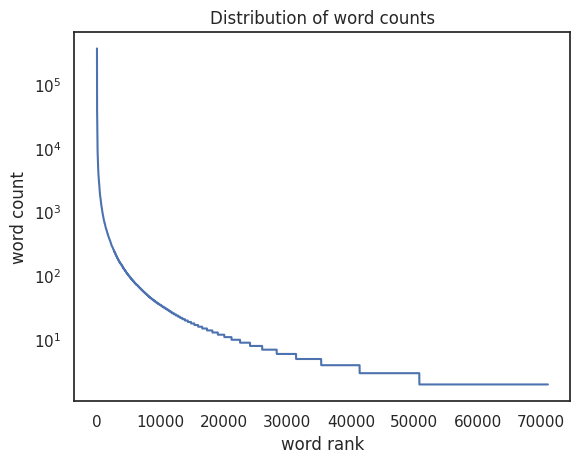

In [ ]:
# get all word counts in list
word_counts = list(word2count.values())

# sort counts in descending order
word_counts_desc = sorted(word_counts, reverse=True)

print("Max count: {}".format(word_counts_desc[0]))
print("Min count: {}".format(word_counts_desc[-1]))

# x-axis
word_ranks = range(0, len(word_counts_desc))

sns.set(style="white")

# Applying logarithmic scale to y-axis
plt.yscale('log')

# creating line plot
plt.plot(word_ranks, word_counts_desc)

# labeling
plt.xlabel("word rank")
plt.ylabel("word count")
plt.title('Distribution of word counts')

plt.show()

In [ ]:
# total number of tokens used in this pre-trained model
total_tokens = np.sum(word_counts_desc)
total_tokens

7581005

In [ ]:
# what percentage of total tokens in the dataset do the top 10 words represent?
top_10_word_count = np.sum(word_counts_desc[:10])
percent = top_10_word_count / total_tokens
percent * 100

21.564964012027428

## Word Vector Properties

In [ ]:
# printing the word vector for word 'science'
index = word2index['science']
word_vector_science = vectors[index]
word_vector_science

array([ 1.29408687e-01, -4.34683293e-01,  7.62890726e-02,  3.50730491e+00,
       -3.88829261e-01,  1.10571229e+00,  1.83017051e+00, -1.63748765e+00,
       -1.21251154e+00,  1.10289383e+00, -2.63813663e+00,  2.12799215e+00,
       -2.26792932e+00, -2.36834288e+00, -2.40277439e-01, -4.01433420e+00,
        6.23689257e-02,  1.79546320e+00,  7.54924893e-01, -5.02390504e-01,
       -3.78446841e+00, -2.43693590e+00,  1.16099608e+00, -2.16766429e+00,
       -1.17018342e+00, -4.75886488e+00,  4.03982639e+00, -3.94360662e-01,
       -1.00139511e+00, -1.22853255e+00,  1.32163334e+00, -2.48321779e-02,
        2.19313574e+00, -1.46642709e+00, -4.67770845e-01,  9.23152208e-01,
       -1.31668997e+00,  1.32956982e+00,  4.40074730e+00, -1.23269200e+00,
        9.14125860e-01, -2.49593973e+00,  3.94694135e-02, -1.10429704e-01,
       -2.82072406e-02,  1.15402162e-01, -3.56829375e-01,  7.79948384e-02,
       -6.89104557e-01,  3.14956784e+00, -8.14570069e-01, -2.06989980e+00,
        4.20725965e+00,  

In [ ]:
len(word_vector_science)

100

In [ ]:
# does vector contains zero?
np.count_nonzero(word_vector_science)

100

In [ ]:
# min, max and average feature values of the vector
np.min(word_vector_science), np.max(word_vector_science), np.mean(word_vector_science)

(-5.593426, 4.6369843, -0.05908966)

### Histogram of feature values

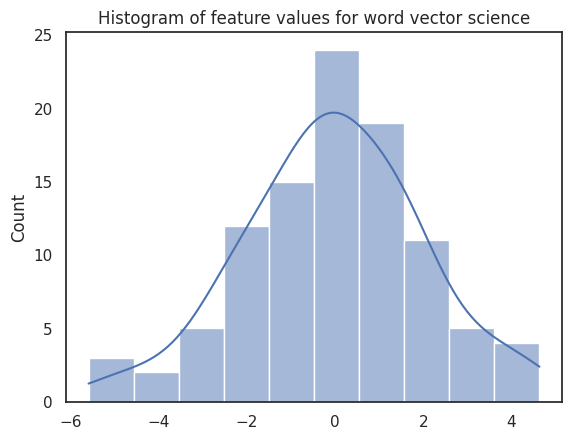

In [ ]:
ax = sns.histplot(word_vector_science, kde = True)
title = ax.set_title('Histogram of feature values for word vector science')

plt.show()